In [1]:
import gbd_mapping
import vivarium_inputs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
from loguru import logger
import sys

logger.remove()  # Remove default handler
logger.add(sys.stderr, level="ERROR")

1

## RR clipping

In [3]:
risk = gbd_mapping.risk_factors.diet_high_in_sodium
cause = gbd_mapping.causes.stomach_cancer

In [4]:
rrs = vivarium_inputs.get_measure(risk, 'relative_risk', 'Global')
rrs

/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [


draw_0  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   2.187531   
                                                                                          7.317279   2.187531   
                                                                                          7.407244   2.187531   
                                                                                          7.514195   2.187531   
                                                                                          7.620522   2.187531   

                                                                                                       draw_1  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   1.386807   
                                                                                          7.317279   1.386807   
                                                                                          7.407244   1.386807   
                                                                                          7.514195   1.386807   
                                                                                          7.620522   1.386807   

                                                                                                       draw_2  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   2.336492   
                                                                                          7.317279   2.336492   
                                 

In [5]:
relevant_rrs = rrs[
    (rrs.index.get_level_values('affected_entity') == cause.name) &
    (rrs.index.get_level_values('affected_measure') == 'incidence_rate') # NOTE: This really means YLDs, is translated within VI
]
relevant_rrs

draw_0  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   2.187531   
                                                                                          7.317279   2.187531   
                                                                                          7.407244   2.187531   
                                                                                          7.514195   2.187531   
                                                                                          7.620522   2.187531   

                                                                                                       draw_1  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   1.386807   
                                                                                          7.317279   1.386807   
                                                                                          7.407244   1.386807   
                                                                                          7.514195   1.386807   
                                                                                          7.620522   1.386807   

                                                                                                       draw_2  \
location sex    age_start age_end    year_start year_end affected_entity affected_measure parameter             
Global   Female 0.0       0.019178   2021       2022     stomach_cancer  incidence_rate   1.429161   1.000000   
                                                                                          1.446978   1.000000   
                                                                                          1.463159   1.000000   
                                                                                          1.479720   1.000000   
                                                                                          1.495330   1.000000   
...                                                                                                       ...   
         Male   95.0      125.000000 2021       2022     stomach_cancer  incidence_rate   7.240266   2.336492   
                                                                                          7.317279   2.336492   
                                 

In [6]:
# It appears the RR is always 1 below age 25 for salt-stomach cancer
if risk.name == 'diet_high_in_sodium' and cause.name == 'stomach_cancer':
    below_25 = relevant_rrs.index.get_level_values('age_end') <= 25
    assert (relevant_rrs[below_25] == 1).all().all()
    relevant_rrs = relevant_rrs[~below_25]
if risk.name == 'iron_deficiency' and cause.name == 'maternal_hemorrhage':
    in_wra = (
        (relevant_rrs.index.get_level_values('sex') == 'Female') &
        (relevant_rrs.index.get_level_values('age_start') >= 10) &
        (relevant_rrs.index.get_level_values('age_end') <= 55)
    )
    assert (relevant_rrs[~in_wra] == 1).all().all()
    relevant_rrs = relevant_rrs[in_wra]
relevant_rrs

draw_0  \
location sex    age_start age_end year_start year_end affected_entity affected_measure parameter             
Global   Female 25.0      30.0    2021       2022     stomach_cancer  incidence_rate   1.429161   1.357031   
                                                                                       1.446978   1.377268   
                                                                                       1.463159   1.395435   
                                                                                       1.479720   1.413818   
                                                                                       1.495330   1.430949   
...                                                                                                    ...   
         Male   95.0      125.0   2021       2022     stomach_cancer  incidence_rate   7.240266   2.187531   
                                                                                       7.317279   2.187531   
                                                                                       7.407244   2.187531   
                                                                                       7.514195   2.187531   
                                                                                       7.620522   2.187531   

                                                                                                    draw_1  \
location sex    age_start age_end year_start year_end affected_entity affected_measure parameter             
Global   Female 25.0      30.0    2021       2022     stomach_cancer  incidence_rate   1.429161   1.136029   
                                                                                       1.446978   1.143076   
                                                                                       1.463159   1.149350   
                                                                                       1.479720   1.155652   
                                                                                       1.495330   1.161481   
...                                                                                                    ...   
         Male   95.0      125.0   2021       2022     stomach_cancer  incidence_rate   7.240266   1.386807   
                                                                                       7.317279   1.386807   
                                                                                       7.407244   1.386807   
                                                                                       7.514195   1.386807   
                                                                                       7.620522   1.386807   

                                                                                                    draw_2  \
location sex    age_start age_end year_start year_end affected_entity affected_measure parameter             
Global   Female 25.0      30.0    2021       2022     stomach_cancer  incidence_rate   1.429161   1.392350   
                                                                                       1.446978   1.414875   
                                                                                       1.463159   1.435120   
                                                                                       1.479720   1.455628   
                                                                                       1.495330   1.474759   
...                                                                                                    ...   
         Male   95.0      125.0   2021       2022     stomach_cancer  incidence_rate   7.240266   2.336492   
                                                                                       7.317279   2.336492   
                                                                                       7.407244   2.336492   
                            

In [7]:
assert (relevant_rrs.groupby(['parameter']).nunique() == 1).all().all()

In [8]:
risk_curve_data = relevant_rrs.groupby('parameter').first()
risk_curve_data

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_490,draw_491,draw_492,draw_493,draw_494,draw_495,draw_496,draw_497,draw_498,draw_499
parameter,,,,,,,,,,,,,,,,,,,,,
1.429161,1.357031,1.136029,1.392350,1.327871,1.314791,1.401571,1.344439,1.407292,1.161007,1.270724,...,1.333732,1.222734,1.287578,1.225544,1.342243,1.406568,1.413348,1.344295,1.466924,1.475798
1.446978,1.377268,1.143076,1.414875,1.346254,1.332354,1.424700,1.363871,1.430799,1.169441,1.285571,...,1.352485,1.234714,1.303455,1.237689,1.361536,1.430027,1.437255,1.363718,1.494431,1.503911
1.463159,1.395435,1.149350,1.435120,1.362741,1.348097,1.445495,1.381308,1.451936,1.176959,1.298860,...,1.369306,1.245417,1.317673,1.248541,1.378846,1.451121,1.458757,1.381147,1.519212,1.529245
1.479720,1.413818,1.155652,1.455628,1.379408,1.364006,1.466567,1.398946,1.473359,1.184516,1.312269,...,1.386316,1.256200,1.332029,1.259474,1.396355,1.472500,1.480553,1.398776,1.544372,1.554974
1.495330,1.430949,1.161481,1.474759,1.394926,1.378812,1.486228,1.415376,1.493352,1.191512,1.324730,...,1.402155,1.266205,1.345377,1.269620,1.412663,1.492450,1.500898,1.415198,1.567893,1.579032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.240266,2.187531,1.386807,2.336492,2.069026,2.017174,2.376369,2.135861,2.401321,1.466337,1.848343,...,2.092521,1.674617,1.911852,1.684500,2.126929,2.398154,2.427905,2.135276,2.670921,2.712544
7.317279,2.187531,1.386807,2.336492,2.069026,2.017174,2.376369,2.135861,2.401321,1.466337,1.848343,...,2.092521,1.674617,1.911852,1.684500,2.126929,2.398154,2.427905,2.135276,2.670921,2.712544
7.407244,2.187531,1.386807,2.336492,2.069026,2.017174,2.376369,2.135861,2.401321,1.466337,1.848343,...,2.092521,1.674617,1.911852,1.684500,2.126929,2.398154,2.427905,2.135276,2.670921,2.712544


In [9]:
x_values = np.linspace(1, 8, 1_000)

In [10]:
def get_risk_curve_function(draw, data):
    if draw == 'mean':
        data = data.mean(axis=1)
    else:
        data = data[draw]

    def risk_curve(exposure):
        return np.interp(exposure, data.index, data.values)

    return risk_curve

In [11]:
rng = np.random.default_rng(1234)

In [12]:
assert risk.tmred.distribution == 'uniform'
tmrel = pd.DataFrame(rng.uniform(low=risk.tmred.min, high=risk.tmred.max, size=500)).T
tmrel.columns = risk_curve_data.columns
tmrel

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_490,draw_491,draw_492,draw_493,draw_494,draw_495,draw_496,draw_497,draw_498,draw_499
0,4.906799,2.520783,4.692985,2.04677,2.276388,1.472365,1.967065,2.274136,4.856317,2.054599,...,4.261109,1.79875,1.866057,4.440838,4.986404,1.800606,3.413915,2.079948,3.183127,4.740493


In [13]:
# Normalize to TMREL
for draw_col in risk_curve_data.columns:
    tmrel_exposure = tmrel.loc[0, draw_col]
    value_at_tmrel = get_risk_curve_function(draw_col, risk_curve_data)(tmrel_exposure)
    risk_curve_data[draw_col] = risk_curve_data[draw_col] / value_at_tmrel

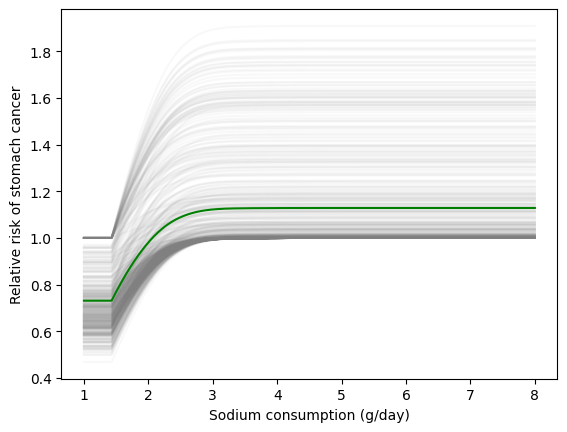

In [14]:
for draw_col in risk_curve_data.columns:
    plt.plot(x_values, get_risk_curve_function(draw_col, risk_curve_data)(x_values), color='gray', alpha=0.05)

plt.plot(x_values, get_risk_curve_function('mean', risk_curve_data)(x_values), color='green')
plt.xlabel('Sodium consumption (g/day)')
plt.ylabel('Relative risk of stomach cancer')
plt.show()

In [15]:
clipped_risk_curve_data = risk_curve_data.copy()
clipped_risk_curve_data

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_490,draw_491,draw_492,draw_493,draw_494,draw_495,draw_496,draw_497,draw_498,draw_499
parameter,,,,,,,,,,,,,,,,,,,,,
1.429161,0.620348,0.831618,0.595916,0.728657,0.697082,0.961819,0.738555,0.637650,0.791774,0.763788,...,0.637420,0.853819,0.798846,0.727550,0.631071,0.764047,0.583047,0.711341,0.551224,0.544064
1.446978,0.629599,0.836776,0.605556,0.738744,0.706394,0.977692,0.749230,0.648301,0.797526,0.772712,...,0.646383,0.862184,0.808696,0.734760,0.640142,0.776790,0.592909,0.721619,0.561561,0.554428
1.463159,0.637904,0.841370,0.614221,0.747791,0.714740,0.991962,0.758808,0.657878,0.802652,0.780700,...,0.654422,0.869658,0.817518,0.741202,0.648280,0.788248,0.601779,0.730841,0.570873,0.563768
1.479720,0.646308,0.845982,0.622998,0.756937,0.723175,1.006422,0.768498,0.667585,0.807806,0.788759,...,0.662551,0.877187,0.826424,0.747693,0.656512,0.799861,0.610771,0.740170,0.580327,0.573253
1.495330,0.654139,0.850249,0.631186,0.765452,0.731025,1.019915,0.777523,0.676644,0.812577,0.796250,...,0.670121,0.884173,0.834706,0.753716,0.664180,0.810698,0.619164,0.748860,0.589166,0.582122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.240266,1.000000,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.000000,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.000000,1.302676,1.001581,1.129893,1.003649,1.000001
7.317279,1.000000,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.000000,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.000000,1.302676,1.001581,1.129893,1.003649,1.000001
7.407244,1.000000,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.000000,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.000000,1.302676,1.001581,1.129893,1.003649,1.000001


In [16]:
for draw_col in clipped_risk_curve_data.columns:
    tmrel_exposure = tmrel.loc[0, draw_col]
    clipped_risk_curve_data[draw_col] = np.where(
        # NOTE: Assumes this pair is considered "harmful"!
        clipped_risk_curve_data.index < tmrel_exposure,
        1,
        clipped_risk_curve_data[draw_col],
    )

In [17]:
clipped_risk_curve_data

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_490,draw_491,draw_492,draw_493,draw_494,draw_495,draw_496,draw_497,draw_498,draw_499
parameter,,,,,,,,,,,,,,,,,,,,,
1.429161,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.446978,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.463159,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.479720,1.0,1.000000,1.000000,1.000000,1.000000,1.006422,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.495330,1.0,1.000000,1.000000,1.000000,1.000000,1.019915,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.240266,1.0,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.0,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.0,1.302676,1.001581,1.129893,1.003649,1.000001
7.317279,1.0,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.0,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.0,1.302676,1.001581,1.129893,1.003649,1.000001
7.407244,1.0,1.015197,1.000001,1.135359,1.069475,1.630768,1.173315,1.088048,1.0,1.110975,...,1.000062,1.169362,1.186162,1.000011,1.0,1.302676,1.001581,1.129893,1.003649,1.000001


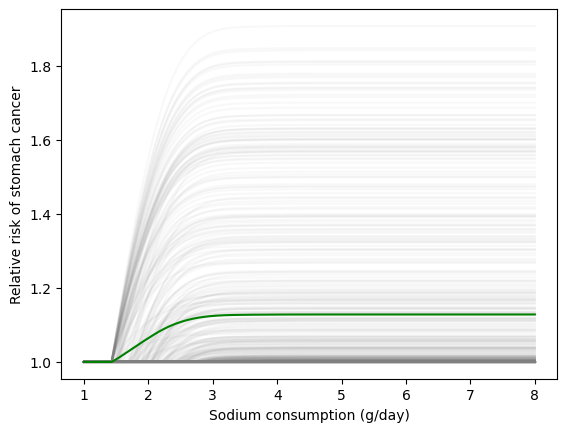

In [18]:
for draw_col in risk_curve_data.columns:
    plt.plot(x_values, get_risk_curve_function(draw_col, clipped_risk_curve_data)(x_values), color='gray', alpha=0.05)

plt.plot(x_values, get_risk_curve_function('mean', clipped_risk_curve_data)(x_values), color='green')
plt.xlabel('Sodium consumption (g/day)')
plt.ylabel('Relative risk of stomach cancer')
plt.show()

In [19]:
import risk_distributions

In [91]:
from pathlib import Path

def get_ensemble_dist_generator(risk, location='Global'):
    import vivarium
    import vivarium_public_health.risks as vivarium_public_health_risks

    # NOTE: Necessary to make a simulation just to get this distribution,
    # see https://jira.ihme.washington.edu/browse/MIC-5126
    import tempfile

    temp_dir = tempfile.TemporaryDirectory()
    art_path = Path(temp_dir.name) / 'artifact.hdf'
    art = vivarium.Artifact(art_path)

    for measure in [
        'exposure',
        'exposure_standard_deviation',
        'exposure_distribution_weights',
    ]:
        df = vivarium_inputs.get_measure(risk, measure, location)
        key = f'risk_factor.{risk.name}.{measure}'
        art.write(key, df.loc[location])

    measure = 'distribution'
    key = f'risk_factor.{risk.name}.{measure}'
    art.write(key, 'ensemble')

    def get_ensemble_dist(draw_num, index_cols, index_values):
        sim = vivarium.InteractiveContext(
            components=[
                vivarium_public_health_risks.Risk(f'risk_factor.{risk.name}'),
            ],
            configuration={'input_data': {'artifact_path': art_path, 'input_draw_number': draw_num}},
        )

        simulation_distribution = sim.list_components()[f'risk_factor.{risk.name}'].exposure_distribution

        weights = simulation_distribution.lookup_tables["ensemble_distribution_weights"].data.set_index(index_cols).loc[index_values]
        parameters = {
            name: parameter.data.set_index(index_cols).loc[index_values] for name, parameter in simulation_distribution.parameters.items()
        }
        return risk_distributions.EnsembleDistribution(weights, parameters), weights, parameters

    get_ensemble_dist.__del__ = lambda: temp_dir.cleanup()

    def get_statistics(draw_num, index_cols, index_values):
        return (
            art.load(f'risk_factor.{risk.name}.exposure').reset_index().set_index(index_cols).loc[index_values].loc[f'draw_{draw_num}'],
            art.load(f'risk_factor.{risk.name}.exposure_standard_deviation').reset_index().set_index(index_cols).loc[index_values].loc[f'draw_{draw_num}'],
        )

    return get_ensemble_dist, get_statistics

In [92]:
group = {
    'sex': 'Female',
    'age_start': 70,
    'age_end': 75,
    'year_start': 2021,
    'year_end': 2022,
}

In [145]:
ensemble_dist_generator, _ = get_ensemble_dist_generator(risk)

/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at /tmp/tmp_exqq43r/artifact.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

In [146]:
bmi_dist_generator, bmi_dist_statistics_generator = get_ensemble_dist_generator(gbd_mapping.risk_factors.high_body_mass_index_in_adults, location='United States of America')
bmi_dist_generator

/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at /tmp/tmp16kgplfe/artifact.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

<function __main__.get_ensemble_dist_generator.<locals>.get_ensemble_dist(draw_num, index_cols, index_values)>

In [147]:
bmi_ensemble_dist, _, _ = bmi_dist_generator(0, list(group.keys()), tuple(group.values()))
bmi_dist_statistics = bmi_dist_statistics_generator(0, list(group.keys()), tuple(group.values()))

In [148]:
bmi_dist_statistics

(31.60025407356766, 10.539191772301375)

Text(0, 0.5, 'Probability density')

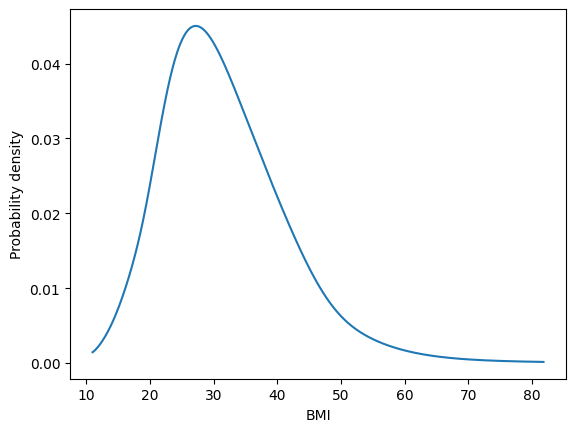

In [149]:
bmi_x = np.linspace(
    pd.concat([v for k, v in bmi_ensemble_dist.parameters.items()]).x_min.min(),
    pd.concat([v for k, v in bmi_ensemble_dist.parameters.items()]).x_max.max(),
    num=1_000,
)

plt.plot(bmi_x, bmi_ensemble_dist.pdf(bmi_x))
plt.xlabel('BMI')
plt.ylabel('Probability density')

Text(0, 0.5, 'Probability density')

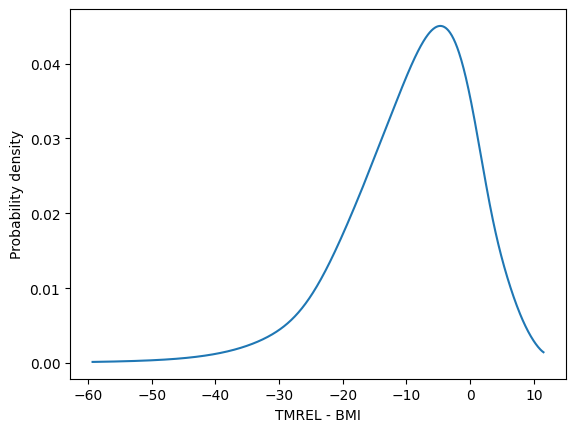

In [163]:
plt.plot(22.5 - bmi_x, bmi_ensemble_dist.pdf(bmi_x))
plt.xlabel('TMREL - BMI')
plt.ylabel('Probability density')

In [151]:
mean_shift = (bmi_dist_statistics[0] - 22.5) * -0.111
mean_shift

-1.01012820216601

In [152]:
sd_shift = bmi_dist_statistics[1] * 0.111
sd_shift

1.1698502867254528

In [153]:
from scipy.stats import norm

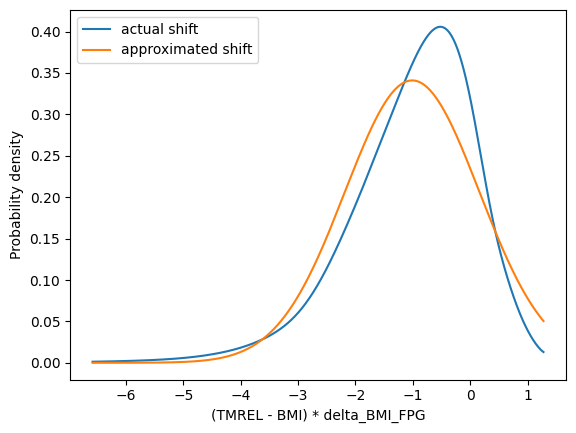

In [162]:
plt.plot((22.5 - bmi_x) * 0.111, bmi_ensemble_dist.pdf(bmi_x) / 0.111, label='actual shift')
plt.plot((22.5 - bmi_x) * 0.111, norm(loc=mean_shift, scale=sd_shift).pdf((22.5 - bmi_x) * 0.111), label='approximated shift')
plt.xlabel('(TMREL - BMI) * delta_BMI_FPG')
plt.ylabel('Probability density')
plt.legend()

In [155]:
fpg_dist_generator, fpg_dist_statistics_generator = get_ensemble_dist_generator(gbd_mapping.risk_factors.high_fasting_plasma_glucose, location='United States of America')
fpg_dist_generator

/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at /tmp/tmpbjucrqxj/artifact.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

<function __main__.get_ensemble_dist_generator.<locals>.get_ensemble_dist(draw_num, index_cols, index_values)>

In [156]:
fpg_ensemble_dist, fpg_ensemble_weights, fpg_ensemble_parameters = fpg_dist_generator(0, list(group.keys()), tuple(group.values()))
fpg_dist_statistics = fpg_dist_statistics_generator(0, list(group.keys()), tuple(group.values()))

In [157]:
fpg_x = np.linspace(
    pd.concat([v for k, v in fpg_ensemble_dist.parameters.items()]).x_min.min(),
    pd.concat([v for k, v in fpg_ensemble_dist.parameters.items()]).x_max.max(),
    num=1_000,
)

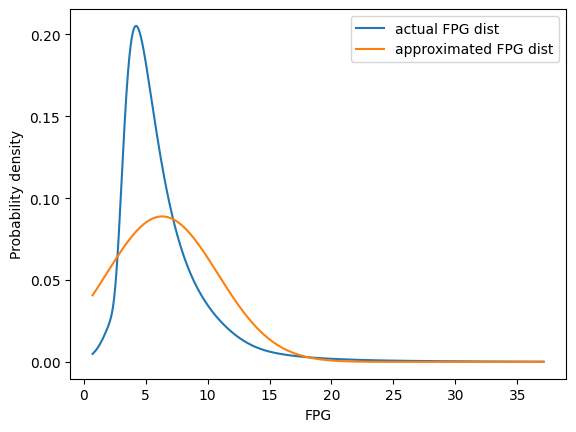

In [160]:
mean_fpg, sd_fpg = fpg_dist_statistics

with np.errstate(under='ignore'):
    plt.plot(fpg_x, fpg_ensemble_dist.pdf(fpg_x), label='actual FPG dist', color='tab:blue')
plt.plot(fpg_x, norm(loc=mean_fpg, scale=sd_fpg).pdf(fpg_x), label='approximated FPG dist', color='tab:orange')
plt.xlabel('FPG')
plt.ylabel('Probability density')
plt.legend()

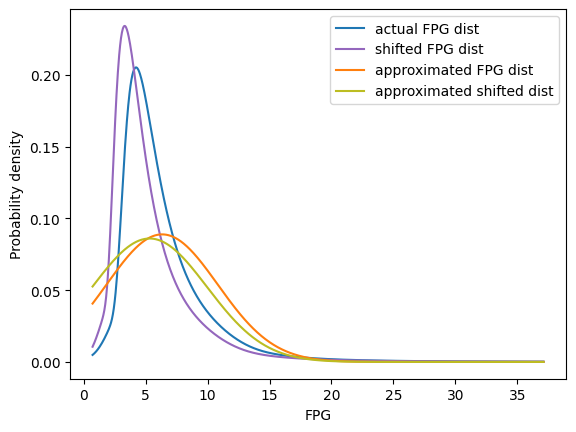

In [165]:
approximated_sum_mean = mean_fpg + mean_shift
approximated_sum_sd = np.sqrt(sd_fpg ** 2 + sd_shift ** 2)

shifted_fpg_dist = risk_distributions.EnsembleDistribution(fpg_ensemble_weights, mean=approximated_sum_mean, sd=approximated_sum_sd)

with np.errstate(under='ignore'):
    plt.plot(fpg_x, fpg_ensemble_dist.pdf(fpg_x), label='actual FPG dist', color='tab:blue')
with np.errstate(under='ignore'):
    plt.plot(fpg_x, shifted_fpg_dist.pdf(fpg_x), label='shifted FPG dist', color='tab:purple')
plt.plot(fpg_x, norm(loc=mean_fpg, scale=sd_fpg).pdf(fpg_x), label='approximated FPG dist', color='tab:orange')
plt.plot(fpg_x, norm(loc=approximated_sum_mean, scale=approximated_sum_sd).pdf(fpg_x), label='approximated shifted dist', color='tab:olive')
plt.xlabel('FPG')
plt.ylabel('Probability density')
plt.legend()

In [34]:
def calculate_paf(risk_curve_func, ensemble_dist):
    x_values = np.linspace(ensemble_dist.parameters['norm'].x_min.iloc[0], ensemble_dist.parameters['norm'].x_max.iloc[0], 1_000)
    pdf = ensemble_dist.pdf(x_values)
    population_mean_rr = np.trapz(
        y=pdf * risk_curve_func(x_values), x=x_values
    )
    if population_mean_rr == 0:
        return 0
    return 1 - 1 / population_mean_rr

In [ ]:
pafs_no_clipping = []
pafs_with_clipping = []

for idx, draw_col in enumerate(risk_curve_data.columns):
    print(idx)
    ensemble_dist = ensemble_dist_generator(idx, list(group.keys()), tuple(group.values()))
    pafs_no_clipping.append(
        calculate_paf(get_risk_curve_function(draw_col, risk_curve_data), ensemble_dist)
    )
    pafs_with_clipping.append(
        calculate_paf(get_risk_curve_function(draw_col, clipped_risk_curve_data), ensemble_dist)
    )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
np.mean(pafs_no_clipping)

0.07523020486488954

In [91]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

centrally_calculated_pafs = vivarium_inputs.get_measure(risk, 'population_attributable_fraction', 'Global')
centrally_calculated_pafs

draw_0  \
location sex    age_start age_end    year_start year_end affected_entity                                    affected_measure                          
Global   Female 0.0       0.019178   2021       2022     atrial_fibrillation_and_flutter                    cause_specific_mortality_rate  0.000000   
                                                                                                            incidence_rate                 0.000000   
                                                         chronic_kidney_disease_due_to_diabetes_mellitus... cause_specific_mortality_rate  0.000000   
                                                                                                            incidence_rate                 0.000000   
                                                         chronic_kidney_disease_due_to_glomerulonephritis   cause_specific_mortality_rate  0.000000   
...                                                                                                                                             ...   
         Male   95.0      125.000000 2021       2022     subarachnoid_hemorrhage                            incidence_rate                 0.013410   
                                                         total_cancers                                      cause_specific_mortality_rate  0.000009   
                                                                                                            incidence_rate                 0.000005   
                                                         total_cancers_excluding_non_melanoma_skin_cancer   cause_specific_mortality_rate  0.000009   
                                                                                                            incidence_rate                 0.000006   

                                                                                                                                                 draw_1  \
location sex    age_start age_end    year_start year_end affected_entity                                    affected_measure                              
Global   Female 0.0       0.019178   2021       2022     atrial_fibrillation_and_flutter                    cause_specific_mortality_rate  0.000000e+00   
                                                                                                            incidence_rate                 0.000000e+00   
                                                         chronic_kidney_disease_due_to_diabetes_mellitus... cause_specific_mortality_rate  0.000000e+00   
                                                                                                            incidence_rate                 0.000000e+00   
                                                         chronic_kidney_disease_due_to_glomerulonephritis   cause_specific_mortality_rate  0.000000e+00   
...                                                                                                                                                 ...   
         Male   95.0      125.000000 2021       2022     subarachnoid_hemorrhage                            incidence_rate                 6.096664e-03   
                                                         total_cancers                                      cause_specific_mortality_rate  2.868321e-11   
                                                                                                            incidence_rate                 1.299724e-11   
                                                         total_cancers_excluding_non_melanoma_skin_cancer   cause_specific_mortality_rate  2.929449e-11   
                                                                                                            incidence_rate                 1.396125e-11   

                                                                                                                                             draw_2  \
location s

In [92]:
centrally_calculated_pafs = centrally_calculated_pafs.reset_index()

In [93]:
corresponding_paf = centrally_calculated_pafs[
    (centrally_calculated_pafs.affected_entity == cause.name) &
    (centrally_calculated_pafs.affected_measure == 'incidence_rate') & # Actually YLDs
    (centrally_calculated_pafs.sex == group['sex']) &
    (centrally_calculated_pafs.age_start == group['age_start']) &
    (centrally_calculated_pafs.age_end == group['age_end'])
]
assert len(corresponding_paf) == 1
corresponding_paf.filter(like='draw').iloc[0].mean()

0.07723036557744122

In [ ]:
# Not exact due to not having the exact TMREL draws
np.mean(pafs_with_clipping)

0.07734555879946611

In [ ]:
np.mean(pafs_with_clipping) - np.mean(pafs_no_clipping)

0.0021153539345765693

In [ ]:
(np.mean(pafs_with_clipping) - np.mean(pafs_no_clipping)) / np.mean(pafs_no_clipping)

0.028118412522944218

## SEV clipping

Done in a different notebook, since it needed different packages.

## Mediation factor application

The switch from applying to scalars to applying to functions.

In [47]:
# Global exposure data seems to not be available!
location = 'United States of America'

In [48]:
# risk = gbd_mapping.risk_factors.diet_high_in_sodium
# risk = gbd_mapping.risk_factors.lead_exposure
# risk = gbd_mapping.risk_factors.smoking
# risk = gbd_mapping.risk_factors.diet_low_in_fruits
distal = gbd_mapping.risk_factors.high_fasting_plasma_glucose

In [49]:
mediator = gbd_mapping.risk_factors.high_systolic_blood_pressure # diet_low_in_omega_6_polyunsaturated_fatty_acids

In [50]:
cause = gbd_mapping.causes.ischemic_stroke

In [51]:
from get_draws.api import get_draws

In [52]:
def clean_rrs(rrs):
    rrs = rrs[rrs.cause_id == cause.gbd_id]
    assert rrs.rei_id.nunique() == 1
    assert rrs.modelable_entity_id.nunique() == 1
    assert rrs.model_version_id.nunique() == 1
    assert (rrs.location_id == 1).all()
    assert (rrs.year_id == 2019).all()
    assert (rrs.metric_id == 3).all() # rate
    assert (rrs.morbidity == 1).all() and (rrs.mortality == 1).all()
    assert (rrs.parameter == 'per unit').all()
    assert rrs.exposure.isnull().all()
    rrs = rrs.drop(columns=['cause_id', 'rei_id', 'modelable_entity_id', 'model_version_id', 'location_id', 'year_id', 'metric_id', 'morbidity', 'mortality', 'parameter', 'exposure'])
    return rrs

In [53]:
distal_rrs = clean_rrs(get_draws("rei_id", distal.gbd_id, location_id=1, year_id=2019, source="rr", release_id=6))
distal_rrs

,age_group_id,sex_id,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
24,10,2,1.5236,1.1877,1.2357,1.1930,1.1221,1.2142,1.1254,1.2041,...,2.5987,2.3437,1.7044,1.3231,1.1216,1.2407,1.1612,1.5519,1.6935,1.8770
25,11,2,1.3974,1.1978,1.2018,1.1970,1.1409,1.1953,1.1236,1.1989,...,2.2713,2.0278,1.5451,1.3219,1.1069,1.2508,1.1223,1.4916,1.5245,1.6430
26,12,2,1.2711,1.2079,1.1679,1.2010,1.1596,1.1764,1.1219,1.1936,...,1.9438,1.7119,1.3857,1.3206,1.0923,1.2609,1.0834,1.4312,1.3555,1.4090
27,13,2,1.2058,1.2075,1.1552,1.2057,1.1696,1.1677,1.1263,1.1898,...,1.7452,1.5116,1.2845,1.3108,1.0940,1.2630,1.0720,1.3804,1.2641,1.2833
28,14,2,1.2012,1.1965,1.1635,1.2110,1.1708,1.1690,1.1370,1.1873,...,1.6755,1.4268,1.2415,1.2923,1.1120,1.2570,1.0880,1.3392,1.2502,1.2658
29,15,2,1.1968,1.1855,1.1718,1.2163,1.1719,1.1703,1.1477,1.1847,...,1.6058,1.3419,1.1985,1.2738,1.1300,1.2510,1.1040,1.2981,1.2364,1.2483
30,16,2,1.1923,1.1745,1.1802,1.2217,1.1731,1.1717,1.1583,1.1823,...,1.5362,1.2571,1.1555,1.2552,1.1480,1.2450,1.1200,1.2569,1.2226,1.2308
31,17,2,1.1877,1.1635,1.1885,1.2270,1.1743,1.1730,1.1690,1.1798,...,1.4665,1.1723,1.1125,1.2368,1.1660,1.2390,1.1360,1.2157,1.2087,1.2132
32,18,2,1.1833,1.1525,1.1968,1.2323,1.1754,1.1743,1.1797,1.1772,...,1.3968,1.0874,1.0695,1.2183,1.1840,1.2330,1.1520,1.1746,1.1949,1.1957
33,19,2,1.1760,1.1384,1.1891,1.2220,1.1651,1.1641,1.1757,1.1667,...,1.3396,1.0647,1.0736,1.1979,1.1941,1.2341,1.1618,1.1550,1.1780,1.1731


In [54]:
mediator_rrs = clean_rrs(get_draws("rei_id", mediator.gbd_id, location_id=1, year_id=2019, source="rr", release_id=6))
mediator_rrs

,age_group_id,sex_id,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
120,10,1,1.7644,2.0326,1.5917,1.9204,1.7511,1.6813,1.5897,1.5528,...,1.5779,1.5589,1.8672,1.6336,2.0695,2.5927,2.4871,1.9611,2.0101,1.6038
121,11,1,1.7026,1.7999,1.6838,1.9771,1.8254,1.7292,1.6318,1.4757,...,1.5271,1.5566,1.8343,1.6209,1.9665,2.1593,2.0359,1.7894,1.8429,1.6047
122,12,1,1.6409,1.5673,1.7759,2.0337,1.8998,1.7771,1.6739,1.3986,...,1.4764,1.5542,1.8014,1.6083,1.8635,1.7257,1.5846,1.6178,1.6756,1.6056
123,13,1,1.5878,1.4392,1.7738,1.9937,1.8853,1.7687,1.6677,1.3697,...,1.4515,1.5447,1.7412,1.5825,1.7853,1.4954,1.3662,1.5208,1.5876,1.5750
124,14,1,1.5435,1.4158,1.6773,1.8573,1.7820,1.7040,1.6130,1.3890,...,1.4525,1.5282,1.6535,1.5435,1.7318,1.4682,1.3805,1.4985,1.5788,1.5130
125,15,1,1.4992,1.3923,1.5808,1.7207,1.6787,1.6393,1.5583,1.4083,...,1.4535,1.5117,1.5658,1.5045,1.6783,1.4411,1.3948,1.4762,1.5699,1.4510
126,16,1,1.4548,1.3688,1.4843,1.5842,1.5753,1.5747,1.5037,1.4277,...,1.4545,1.4952,1.4782,1.4655,1.6247,1.4139,1.4092,1.4538,1.5611,1.3890
127,17,1,1.4105,1.3453,1.3878,1.4478,1.4720,1.5100,1.4490,1.4470,...,1.4555,1.4787,1.3905,1.4265,1.5713,1.3868,1.4235,1.4315,1.5522,1.3270
128,18,1,1.3662,1.3217,1.2913,1.3113,1.3687,1.4453,1.3943,1.4663,...,1.4565,1.4623,1.3028,1.3875,1.5178,1.3596,1.4378,1.4092,1.5434,1.2650
129,19,1,1.3233,1.2910,1.2372,1.2618,1.2942,1.3842,1.3405,1.4442,...,1.4247,1.4186,1.2422,1.3428,1.4552,1.3204,1.4079,1.3692,1.5008,1.2176


In [55]:
distal_rrs = distal_rrs[
    (distal_rrs.age_group_id == 19) & # 70-75, must match group below!
    (distal_rrs.sex_id == 2) # Female, must match group below!
].filter(like='draw_')
distal_rrs

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
33,1.176,1.1384,1.1891,1.222,1.1651,1.1641,1.1757,1.1667,1.1679,1.1699,...,1.3396,1.0647,1.0736,1.1979,1.1941,1.2341,1.1618,1.155,1.178,1.1731


In [56]:
mediator_rrs = mediator_rrs[
    (mediator_rrs.age_group_id == 19) &
    (mediator_rrs.sex_id == 2)
].filter(like='draw_')
mediator_rrs

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
399,1.3233,1.291,1.2372,1.2618,1.2942,1.3842,1.3405,1.4442,1.2374,1.3463,...,1.4247,1.4186,1.2422,1.3428,1.4552,1.3204,1.4079,1.3692,1.5008,1.2176


In [57]:
rng = np.random.default_rng(1234)

In [58]:
assert distal.tmred.distribution == 'uniform'
distal_tmrel_draws = pd.DataFrame(rng.uniform(distal.tmred.min, distal.tmred.max, size=1_000)).T
distal_tmrel_draws.columns = distal_rrs.columns
assert mediator.tmred.distribution == 'uniform'
mediator_tmrel_draws = pd.DataFrame(rng.uniform(mediator.tmred.min, mediator.tmred.max, size=1_000)).T
mediator_tmrel_draws.columns = mediator_rrs.columns

In [59]:
def get_risk_curve_function_log_linear(draw, rr, tmrel):
    if draw == 'mean':
        rr = rr.mean(axis=1)
        tmrel = tmrel.mean(axis=1)
    else:
        rr = rr[draw]
        tmrel = tmrel[draw]

    assert len(rr) == 1
    rr = rr.iloc[0]
    assert len(tmrel) == 1
    tmrel = tmrel.iloc[0]

    def risk_curve(exposure):
        return np.where(
            # NOTE: Assumes harmful risk-outcome pair
            exposure < tmrel,
            1,
            rr ** (exposure - tmrel),
        )

    return risk_curve

In [60]:
group = {
    'sex': 'Female',
    'age_start': 70,
    'age_end': 75,
    'year_start': 2021,
    'year_end': 2022,
}

In [61]:
ensemble_dist_generator_distal = get_ensemble_dist_generator(distal, location=location)

/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at /tmp/tmp4x9aws12/artifact.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [
/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

In [62]:
ensemble_dist_generator_mediator = get_ensemble_dist_generator(mediator, location=location)

________________________________________________________________________________
[Memory] Calling vivarium_gbd_access.gbd.get_exposure...
get_exposure(rei_id(107), [102], 2021, 'draws')


/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium/framework/artifact/artifact.py:69: UserWarning: No artifact found at /tmp/tmp9n8y23jo/artifact.hdf. Building new artifact.
  warnings.warn(f"No artifact found at {path}. Building new artifact.")


_____________________________________________________get_exposure - 2.5s, 0.0min


/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [


________________________________________________________________________________
[Memory] Calling vivarium_gbd_access.gbd.get_exposure_standard_deviation...
get_exposure_standard_deviation(rei_id(107), [102], 2021, 'draws')
__________________________________get_exposure_standard_deviation - 5.4s, 0.1min


/mnt/share/homes/zmbc/mambaforge/envs/vivarium_gates_mncnh_artifact/lib/python3.11/site-packages/vivarium_inputs/utilities.py:508: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f"{split_column_prefix}_end"] = [


In [101]:
def calculate_paf(risk_curve_func, ensemble_dist):
    x_values = np.linspace(ensemble_dist.parameters['norm'].x_min.iloc[0] + 1e-10, ensemble_dist.parameters['norm'].x_max.iloc[0] - 1e-10, 1_000)
    with np.errstate(under='ignore'):
        pdf = ensemble_dist.pdf(x_values)
    pdf[np.isinf(pdf)] = 0
    population_mean_rr = np.trapz(
        y=pdf * risk_curve_func(x_values), x=x_values
    )
    # if population_mean_rr == 0:
    #     return 0
    return 1 - (1 / population_mean_rr)

In [64]:
# HACK got this from the methods appendix and did not use uncertainty
assert distal == gbd_mapping.risk_factors.high_fasting_plasma_glucose
assert mediator == gbd_mapping.risk_factors.high_systolic_blood_pressure
assert cause == gbd_mapping.causes.ischemic_stroke
mediation_factor = 0.15

In [65]:
def apply_mediation_factor_to_function_new_way(risk_curve_func):
    def result(exposure):
        return 1 + (risk_curve_func(exposure) - 1) * (1 - mediation_factor)

    return result

In [66]:
distal_rrs

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
33,1.176,1.1384,1.1891,1.222,1.1651,1.1641,1.1757,1.1667,1.1679,1.1699,...,1.3396,1.0647,1.0736,1.1979,1.1941,1.2341,1.1618,1.155,1.178,1.1731


In [67]:
distal_rrs_unmediated_old_way = 1 + (distal_rrs - 1) * (1 - mediation_factor)
distal_rrs_unmediated_old_way

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
33,1.1496,1.11764,1.160735,1.1887,1.140335,1.139485,1.149345,1.141695,1.142715,1.144415,...,1.28866,1.054995,1.06256,1.168215,1.164985,1.198985,1.13753,1.13175,1.1513,1.147135


In [68]:
draw_col = 'draw_100'
distal_risk_curve_unmediated_old_way = get_risk_curve_function_log_linear(draw_col, distal_rrs_unmediated_old_way, distal_tmrel_draws)
distal_risk_curve_unmediated_new_way = apply_mediation_factor_to_function_new_way(get_risk_curve_function_log_linear(draw_col, distal_rrs, distal_tmrel_draws))

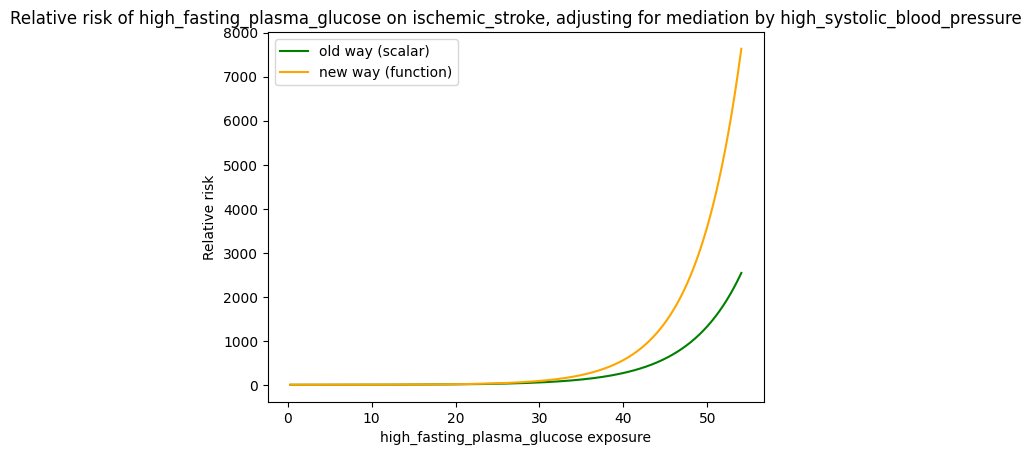

In [ ]:
ensemble_dist_distal = ensemble_dist_generator_distal(100, list(group.keys()), tuple(group.values()))
x_values = np.linspace(ensemble_dist_distal.parameters['norm'].x_min.iloc[0], ensemble_dist_distal.parameters['norm'].x_max.iloc[0], 1_000)
plt.plot(x_values, distal_risk_curve_unmediated_old_way(x_values), color='green', label='old way (scalar)')
plt.plot(x_values, distal_risk_curve_unmediated_new_way(x_values), color='orange', label='new way (function)')
plt.xlabel(f'{distal.name} exposure')
plt.ylabel(f'Relative risk')
plt.title(f'Relative risk of {distal.name} on {cause.name}, adjusting for mediation by {mediator.name}')
plt.legend()
plt.show()

In [112]:
distal_paf

0.8408258560513797

In [115]:
mediator_paf

0.9999886572097432

In [126]:
ensemble_dist = ensemble_dist_mediator
risk_curve_func = get_risk_curve_function_log_linear(draw_col, mediator_rrs, mediator_tmrel_draws)
x_values = np.linspace(ensemble_dist.parameters['norm'].x_min.iloc[0] + 1e-10, ensemble_dist.parameters['norm'].x_max.iloc[0] - 1e-10, 1_000)
pdf = ensemble_dist.pdf(x_values)

In [127]:
np.any(np.isinf(pdf))

False

In [128]:
pdf

array([0.00046808, 0.00047332, 0.00047862, 0.00048399, 0.00048944,
       0.00049495, 0.00050054, 0.0005062 , 0.00051195, 0.00051777,
       0.00052367, 0.00052966, 0.00053573, 0.00054189, 0.00054814,
       0.00055448, 0.00056091, 0.00056743, 0.00057405, 0.00058077,
       0.00058758, 0.0005945 , 0.00060151, 0.00060863, 0.00061586,
       0.00062319, 0.00063063, 0.00063818, 0.00064584, 0.00065361,
       0.0006615 , 0.00066951, 0.00067763, 0.00068588, 0.00069425,
       0.00070274, 0.00071135, 0.0007201 , 0.00072897, 0.00073797,
       0.00074711, 0.00075638, 0.00076579, 0.00077534, 0.00078503,
       0.00079486, 0.00080484, 0.00081497, 0.00082525, 0.00083568,
       0.00084627, 0.00085702, 0.00086792, 0.00087899, 0.00089023,
       0.00090164, 0.00091322, 0.00092497, 0.00093691, 0.00094902,
       0.00096132, 0.00097382, 0.0009865 , 0.00099939, 0.00101247,
       0.00102576, 0.00103926, 0.00105297, 0.00106691, 0.00108107,
       0.00109545, 0.00111008, 0.00112494, 0.00114005, 0.00115

In [125]:
risk_curve_func(x_values)

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

In [ ]:

# pdf[np.isinf(pdf)] = 0
population_mean_rr = np.trapz(
    y=pdf * risk_curve_func(x_values), x=x_values
)
# if population_mean_rr == 0:
#     return 0
return 1 - (1 / population_mean_rr)

In [103]:
# Calculate PAFs for a hypothetical group including only the distal and mediator

pafs_ignoring_mediation = []
pafs_old_way = []
pafs_new_way = []

for idx, draw_col in enumerate(distal_rrs.columns):
    # TODO: All 1,000 draws
    if idx > 100:
        break
    print(idx)
    ensemble_dist_distal = ensemble_dist_generator_distal(idx, list(group.keys()), tuple(group.values()))
    ensemble_dist_mediator = ensemble_dist_generator_mediator(idx, list(group.keys()), tuple(group.values()))

    distal_paf = calculate_paf(get_risk_curve_function_log_linear(draw_col, distal_rrs, distal_tmrel_draws), ensemble_dist_distal)
    distal_unmediated_paf_old_way = calculate_paf(get_risk_curve_function_log_linear(draw_col, distal_rrs_unmediated_old_way, distal_tmrel_draws), ensemble_dist_distal)
    distal_unmediated_paf_new_way = calculate_paf(
        apply_mediation_factor_to_function_new_way(get_risk_curve_function_log_linear(draw_col, distal_rrs, distal_tmrel_draws)), ensemble_dist_distal
    )

    mediator_paf = calculate_paf(get_risk_curve_function_log_linear(draw_col, mediator_rrs, mediator_tmrel_draws), ensemble_dist_mediator)

    pafs_ignoring_mediation.append(
        1 - (1 - distal_paf) * (1 - mediator_paf)
    )
    pafs_old_way.append(
        1 - (1 - distal_unmediated_paf_old_way) * (1 - mediator_paf)
    )
    pafs_new_way.append(
        1 - (1 - distal_unmediated_paf_new_way) * (1 - mediator_paf)
    )

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [110]:
np.mean(pafs_ignoring_mediation)

0.9999644111735311

In [111]:
np.mean(pafs_old_way)

0.9999583681872644

In [106]:
np.mean(pafs_new_way)

0.99996197957994

In [107]:
np.mean(pafs_new_way) - np.mean(pafs_old_way)

3.611392675684222e-06

In [108]:
# % change in PAF due to formula change
(np.mean(pafs_new_way) - np.mean(pafs_old_way)) / np.mean(pafs_old_way)

3.6115430307673654e-06

In [109]:
# % change in effect of including mediation, due to formula change
mediation_adjustment_old = (np.mean(pafs_ignoring_mediation) - np.mean(pafs_old_way))
mediation_adjustment_new = (np.mean(pafs_ignoring_mediation) - np.mean(pafs_new_way))
(
    mediation_adjustment_new - mediation_adjustment_old
) / mediation_adjustment_old

-0.5976172237182823

## Mediation and RR application

In [29]:
distal = gbd_mapping.risk_factors.high_body_mass_index
mediator = gbd_mapping.risk_factors.high_fasting_plasma_glucose
cause = gbd_mapping.causes.chronic_kidney_disease